In [55]:
import pandas as pd

# What is Pandas?
The Pandas library is a powerful open-source data analysis and manipulation library for Python. It is widely used in data science, machine learning, and data engineering due to its flexibility and efficiency in handling structured data. Pandas is built on top of NumPy and provides user-friendly, high-level tools to work with labeled and relational data.

Pandas Introduces 2 Unique Data structures  
- Series: A one-dimensional labeled array capable of holding any data type (integers, strings, floats, etc.).
- DataFrame: A two-dimensional labeled data structure, similar to a table in a relational database or an Excel spreadsheet.

In [77]:
df = pd.read_csv('data/Titanic-Dataset.csv',)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning With Pandas

## Handling Missing Data

In [79]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Only Missing Data are in Col: Age, Cabin and Embarked**

In [80]:
copy_df = df.copy()

In [81]:
f"Total Data Points {len(copy_df)}"

'Total Data Points 891'

### Ignoring Tuple

In [82]:
df_after_tuple_dropped = copy_df.dropna()
f"Total Data Points {len(df_after_tuple_dropped)}"

'Total Data Points 183'

In [83]:
df_after_tuple_dropped.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Issue is exterem loss of tuples. Might result in bad machine learning model due to lack of rows**

### By Imputation

In [84]:
import numpy as np

In [85]:
mode_of_embarked = copy_df['Embarked'].mode()[0]

In [86]:
imp_df = copy_df
imp_df['Embarked'] = copy_df['Embarked'].fillna(mode_of_embarked)
imp_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [87]:
replace_val = {
    'Age': copy_df['Age'].median(),
}
imp_df = imp_df.fillna(replace_val)

In [88]:
imp_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [89]:
imp_df = imp_df.drop(columns=['Cabin'])
imp_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [90]:
imp_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [91]:
copy_df = imp_df

## Normalization

In [92]:
copy_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
def hist_w_kdf(copy_df):
    for column in copy_df.drop(columns=['PassengerId', 'Name', 'Sex', 'Embarked', 'Ticket']).columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(copy_df[column], kde=True, bins=30, color="blue")
        plt.title(f"Histogram and KDE for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

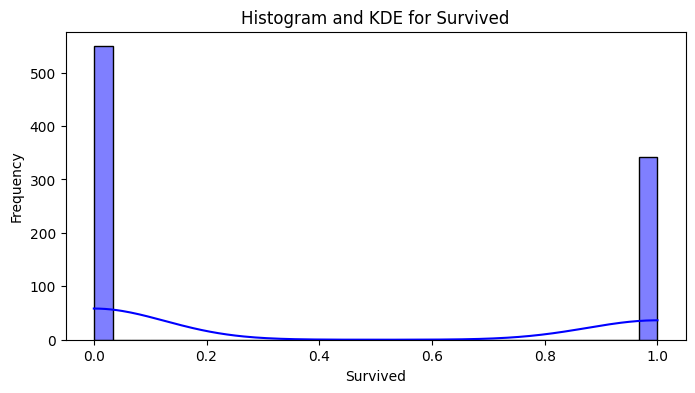

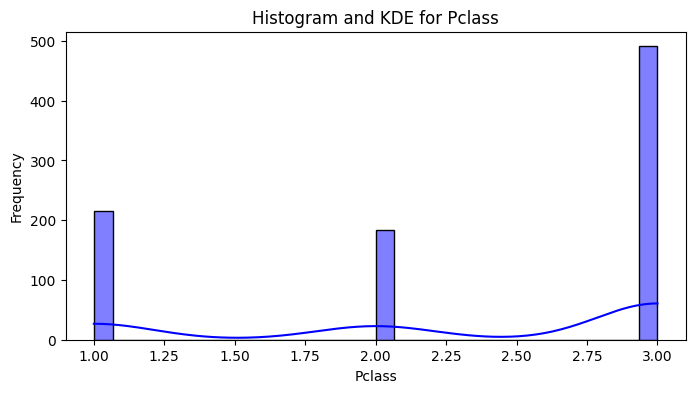

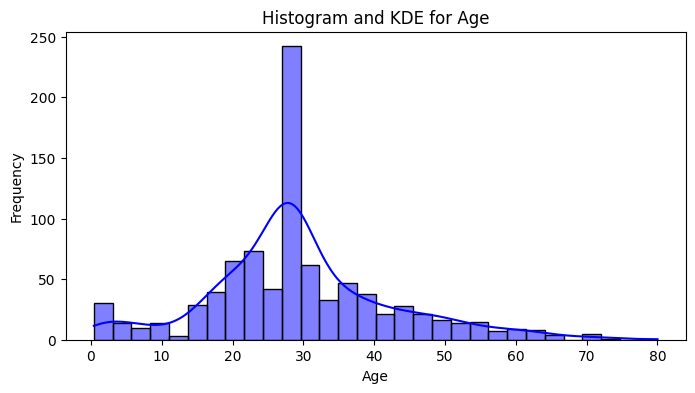

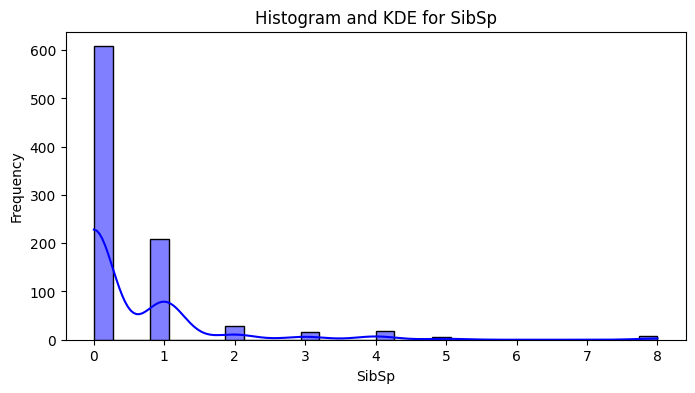

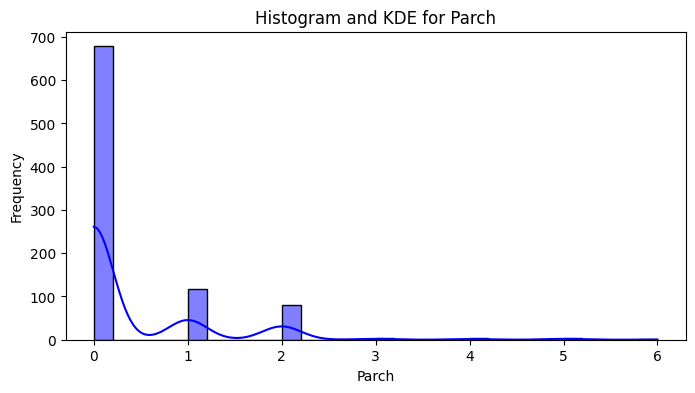

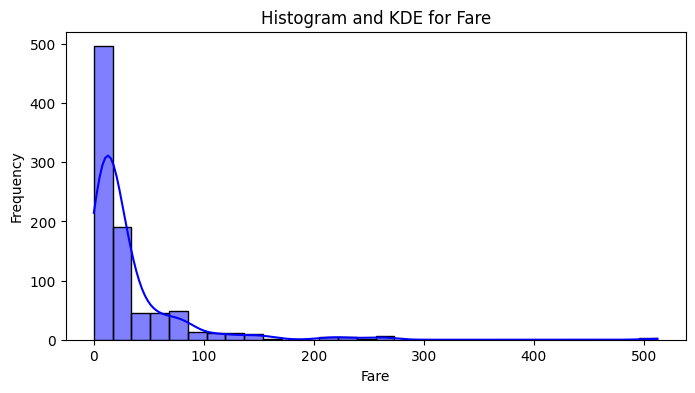

In [95]:
hist_w_kdf(copy_df)

1. **Logarithmic Transformation**  
Purpose: Reduces right skewness by compressing large values more than small values.  
Suitable For: Non-negative data where min x > zero  
Formula: Log(𝑥+1)(adding 1 ensures no issues with zero values).  
>
**Effect:**

>Compresses values at the high end (e.g., closer to 556).  
Leaves smaller values relatively unaffected.

2. **Box-Cox Transformation**  
Purpose: Normalizes skewed data to make it resemble a normal distribution.    
Suitable For: Positive data (min>0).  
Formula: Box-Cox applies a power transformation, tuned by a parameter λ, that is chosen to minimize skewness.    
Use From: `from scipy.stats import boxcox`  
>
**Effect:**

>Dynamically adjusts the transformation to reduce skewness.    
Works better than log transformation in some cases for very heavy skewness.    

3. **Yeo-Johnson Transformation**  
Purpose: Similar to Box-Cox but handles zero and negative values.    
Suitable For: Data that includes zeros or negatives.  
Formula: A flexible transformation method; handles negative and zero values without requiring a shift.  
Use From: `from sklearn.preprocessing import PowerTransformer`  
>
**Effect:**    

>Works well for skewed data, even when there are zeros.  
Automatically selects the best transformation parameters.  

In [96]:
# Using Log Trans
copy_df['Fare'] = np.log(copy_df['Fare'] + 1)

# Standarization
copy_df['Age'] = (copy_df['Age'] - copy_df['Age'].mean()) / copy_df['Age'].std()

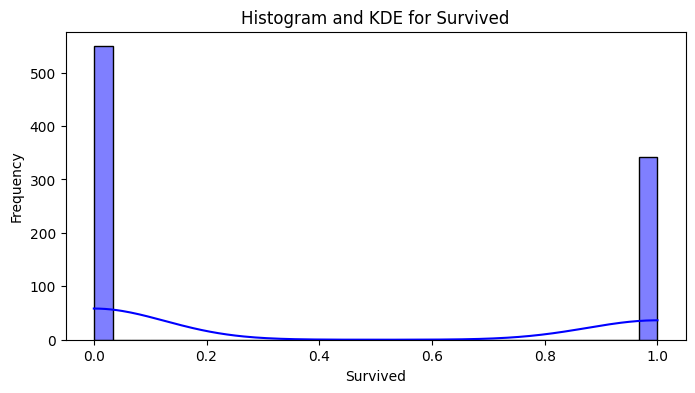

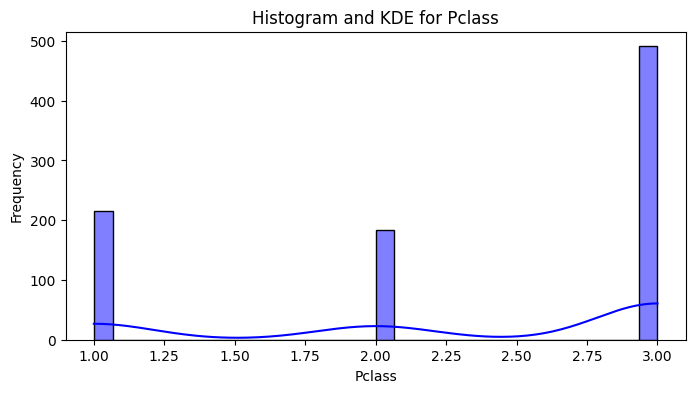

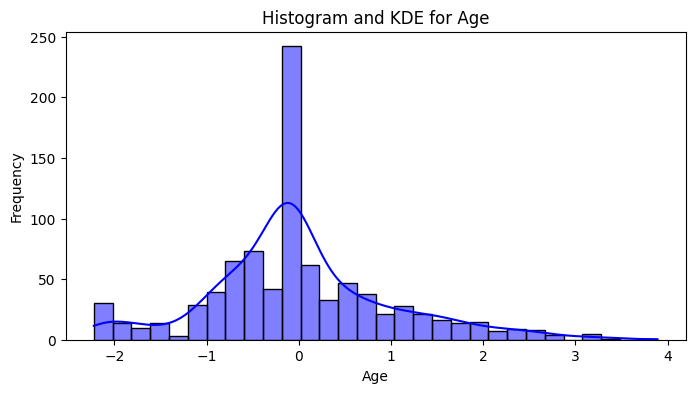

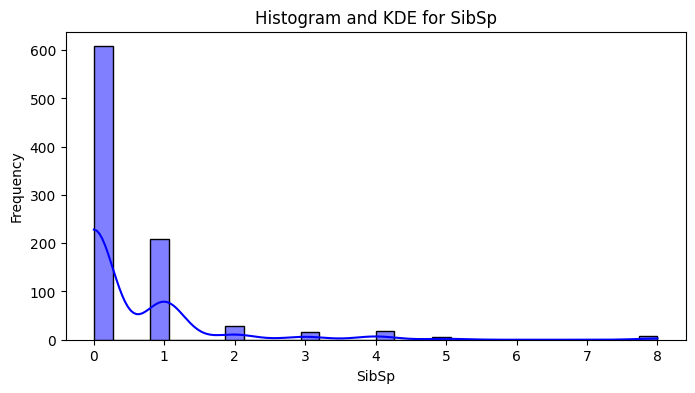

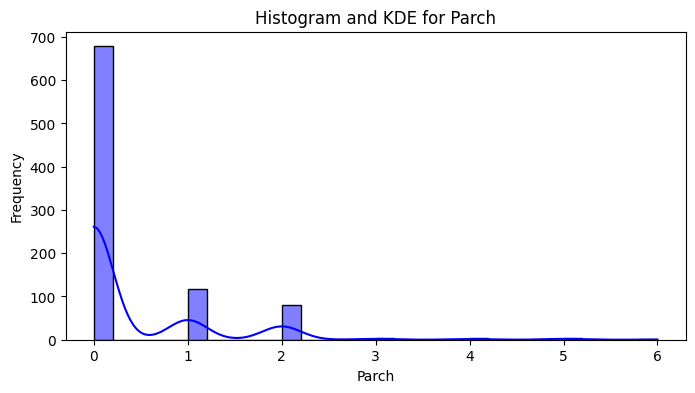

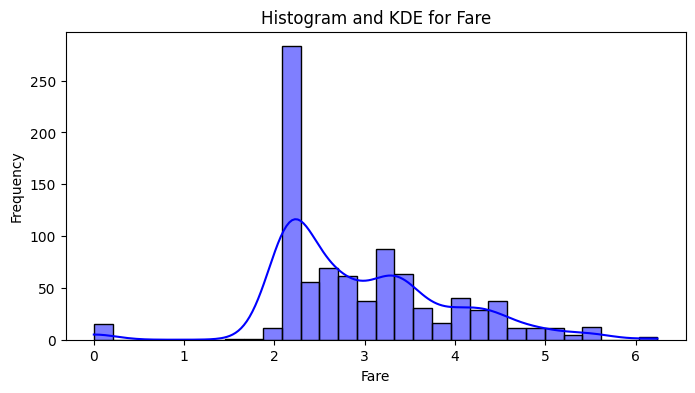

In [97]:
hist_w_kdf(copy_df)